In [154]:
#基础操作1
#Python字典生成Pandas表格数据(DaraFrame)
#行索引与列索引(index vs. columns)
#行索引与列索引的指定
#四种选取数据的方法(loc vs. iloc vs. at vs. iat)
#与list/dict/Numpy的转化(to_list(),to_dict(),to_numpy())

In [155]:
# 引用三个库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [156]:
#从Python字典生成DataFrame表格
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
zrg1_dict={"abc":[1,2,44,14],
          "efg":[134,41,34,1],
          "hhh":['a','b','c','d']}
zrg2_dict={"abc":[1,2,44,14],
          "efg":[134,41,34,1],
          "hhh":['a','b','c','d']}
# 单独指定行索引
zrg1 = pd.DataFrame(zrg1_dict, index=["行1", "行2", "行3", "行4"])
zrg2 = pd.DataFrame(zrg2_dict)
display(zrg1)
display(zrg2)

,abc,efg,hhh
行1,1,134,a
行2,2,41,b
行3,44,34,c
行4,14,1,d


,abc,efg,hhh
0,1,134,a
1,2,41,b
2,44,34,c
3,14,1,d


In [157]:
#列名/索引(column index)与行索引(row index)来访问

# 获取列名 (Column Index)
a = zrg1.columns
a1 = zrg2.columns
# 输出: Index(['abc', 'efg', 'hhh'], dtype='object')
# 解读: 
# - Index(...): 说明这是 Pandas 的索引对象。
# - dtype='object': 说明列名里面的内容是“文本/字符串”。

# 获取行索引 (Row Index)
b = zrg1.index
b1 = zrg2.index
# 输出: RangeIndex(start=0, stop=4, step=1)
# 解读: 
# - RangeIndex: 因为你没指定行名，Pandas 自动生成了类似 range(0, 4) 的省内存索引。
# - 代表实际的行号是 0, 1, 2, 3。


# 转换为 Python 原生列表 (纯净的数据，去掉了 Pandas 包装) ---

# 把列名转成列表
c = zrg1.columns.tolist()
c1 = zrg2.columns.tolist()
# 输出: ['abc', 'efg', 'hhh']
# 解读: 变成了标准的 Python List，方便用 for 循环处理或传给其他非 Pandas 函数。

# 把行索引转成列表
d = zrg1.index.tolist()
d1 = zrg2.index.tolist()
# 输出: [0, 1, 2, 3]
# 解读: 把刚才的 RangeIndex 展开成了实实在在的数字列表。



print(a) # 打印 Pandas 列索引对象
print(a1)
print(b) # 打印 Pandas 行索引对象
print(b1)
print(c) # 打印 Python 列名列表
print(c1)
print(d) # 打印 Python 行号列表
print(d1)

Index(['abc', 'efg', 'hhh'], dtype='object')
Index(['abc', 'efg', 'hhh'], dtype='object')
Index(['行1', '行2', '行3', '行4'], dtype='object')
RangeIndex(start=0, stop=4, step=1)
['abc', 'efg', 'hhh']
['abc', 'efg', 'hhh']
['行1', '行2', '行3', '行4']
[0, 1, 2, 3]


In [158]:
# 对行/列的索引进行重新命名
zrg1 = zrg1.rename(index={"行1":"whw"})
display(zrg1)  

,abc,efg,hhh
whw,1,134,a
行2,2,41,b
行3,44,34,c
行4,14,1,d


In [159]:
# 重新生成python的 字典
zrg1_dict = zrg1.to_dict()
zrg1 = pd.DataFrame(zrg1_dict)
display(zrg1)

,abc,efg,hhh
whw,1,134,a
行2,2,41,b
行3,44,34,c
行4,14,1,d


In [160]:
# 访问表格中一列的数据
print(zrg1['abc'])
print(type(zrg1['abc'])) #返回pandas.series序列结构
zrg1[['abc','efg']] #输入一个list来访问多个列

whw     1
行2      2
行3     44
行4     14
Name: abc, dtype: int64
<class 'pandas.core.series.Series'>


,abc,efg
whw,1,134
行2,2,41
行3,44,34
行4,14,1


In [161]:
# 访问表格中一行的数据
print(zrg1.loc['whw'])
zrg1.loc[['whw']] #保留DataFrame格式

abc      1
efg    134
hhh      a
Name: whw, dtype: object


,abc,efg,hhh
whw,1,134,a


In [162]:
# 访问表格中一行的数据 不使用行的名字而是通过从0开始的编号进行
print(zrg1.iloc[1,:]) # 编号为1 即第二行
zrg1.iloc[[0],:] #第一行

abc     2
efg    41
hhh     b
Name: 行2, dtype: object


,abc,efg,hhh
whw,1,134,a


In [163]:
#视频看到了2:14 链接为：https://www.bilibili.com/video/BV1rt4y1W769/?spm_id_from=333.1007.top_right_bar_window_history.content.click&vd_source=110dbb9521e220794463f24d6a8b3971

In [164]:
# 访问多个行或列
display(zrg1.iloc[0:2, 0:2]) #切片法 (Slicing) 注意区间是左闭右开
display(zrg1.iloc[[0,1],[0,1]]) #访问索引为0和1的行 访问索引为0和1的列

,abc,efg
whw,1,134
行2,2,41


,abc,efg
whw,1,134
行2,2,41


In [165]:
# 访问一个元素
zrg1.at['whw','abc'] # 单独访问'whw'行和'abc'列交叉的元素

1

In [166]:
# 访问一个元素并修改它
zrg1.at['whw','abc'] = 666 # 'whw'行和'abc'列交叉的元素被修改为666了
zrg1

,abc,efg,hhh
whw,666,134,a
行2,2,41,b
行3,44,34,c
行4,14,1,d


In [167]:
#基础操作2 实际工作常用命令
#外部数据的读取 如：pd.read_csv()
#通过打印预览 DataFrame信息 .head() / .tail() / .sample()
#基本信息预览 .shape / len() / .dtypes / .describe() / .info()
#统计性信息 .unique() / .groupby() / .apply()
#索引的设置 .set_index() / .reset_index()
#更多信息：https://pandas.pydata.org/docs/user_guide/index.html

In [168]:
# 使用泰坦尼克乘客数据表格 通过csv文件传入
titanic = pd.read_csv('titanic.csv')
print(len(titanic))
print(titanic.shape) 
# 更多输出/输入格式见 视频2:45 链接https://www.bilibili.com/video/BV1rt4y1W769/?spm_id_from=333.1007.top_right_bar_window_history.content.click&vd_source=110dbb9521e220794463f24d6a8b3971

891
(891, 12)


In [169]:
#打印表格的部分记录(行)
#display(titanic.head()) #返回前5行
#display(titanic.tail(10)) #返回最后10行
#display(titanic.sample(3)) #任意返回3行

In [170]:
# 查看数据类型的分布
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [171]:
# 查看表格索引/列的类型/占用内存
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [172]:
# 显示每一列数据的类型
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [173]:
# 访问一列中所有出现过的值
print(titanic['Age'].unique()) #年龄
print(titanic['Sex'].unique()) #性别
print(titanic['Pclass'].unique()) #船舱等级
print(titanic['Survived'].unique()) #存货属性

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
['male' 'female']
[3 1 2]
[0 1]


In [174]:
# 根据一个列的值分类 对某个类型集计信息
titanic[['Sex','PassengerId']].groupby(['Sex']).count()
# 只看性别和ID，按性别把人分开，然后数数每一组各有多少个ID

,PassengerId
Sex,
female,314
male,577


In [175]:
# 根据多个列的值分类 对个类型集计信息
survive_by_class = titanic[['Pclass','Survived','PassengerId']].groupby(['Pclass','Survived']).count()
# 只看船舱等级、是否存活、ID，按船舱等级、是否存活把人分开，然后数数每组一各有多少个ID
survive_by_class 
# 这时候如果你想画图，Seaborn 去找名为 Pclass 的列，是找不到的。因为它现在是索引（相当于表格的“侧边栏”或“目录”），不在普通数据区

PassengerId
Pclass Survived             
1      0                  80
       1                 136
2      0                  97
       1                  87
3      0                 372
       1                 119

In [176]:
# 将成为行索引的列归还为一个列
# 画图前的必要操作 将上面的含有行索引，即“侧栏”的表格归还为一个普通地二维表
survive_by_class = survive_by_class.reset_index()
#把那些坐在索引位置（侧边栏）的 Pclass 和 Survived，全部拉下来，变回普通的列
survive_by_class = survive_by_class.rename(columns={"PassengerId":"count"})
survive_by_class

,Pclass,Survived,count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


<Axes: xlabel='Pclass', ylabel='count'>

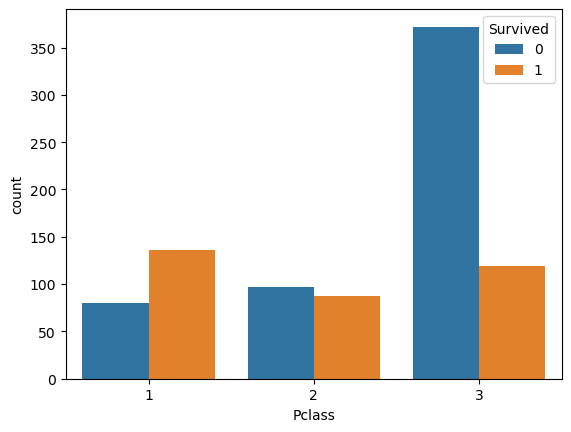

In [177]:
# 使用seaborn绘图
import seaborn as sns
sns.barplot(data = survive_by_class, x = "Pclass", y = "count", hue = "Survived")

In [178]:
# set_index 与 reset_index 互为逆运算
survive_by_class.set_index(['Pclass','Survived'])
# 使用 set_index 会把刚刚的二维表格再处理为含有行索引的

count
Pclass Survived       
1      0            80
       1           136
2      0            97
       1            87
3      0           372
       1           119

In [179]:
# 根据列元素中的值动态选择是否记录
filt = (~titanic['Age'].isnull())
#isnull()：找出“年龄是空的”人
#~：是一个取反符号（Not），意思是“不要那些空的” 三个逻辑判断：~：取反 &：取和 |：取或
#把表格里没有年龄的乘客直接剔除了
titanic = titanic.loc[filt,:]
titanic.head(10) # 默认取5行 改变括号里数字可以改变行数

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [180]:
# 使用.agg()一次性获取多种统计信息
def percentile_25(x):
    return x.quantile(0.25)
def percentile_75(x):
    return x.quantile(0.75)
age_agg = titanic[['Pclass','Survived','Age']].groupby(['Pclass','Survived']).agg(['min','max','median','mean', len, 'std', percentile_25, percentile_75])
# 在这个版本的numpy建议直接传字符串'std'而不是 np.std
age_agg

Age                                                        \
                   min   max median       mean  len        std percentile_25   
Pclass Survived                                                                
1      0          2.00  71.0  45.25  43.695312   64  15.284243         31.00   
       1          0.92  80.0  35.00  35.368197  122  13.760017         24.25   
2      0         16.00  70.0  30.50  33.544444   90  12.151581         25.00   
       1          0.67  62.0  28.00  25.901566   83  14.837787         17.50   
3      0          1.00  74.0  25.00  26.555556  270  12.334882         19.00   
       1          0.42  63.0  22.00  20.646118   85  11.995047         14.00   

                               
                percentile_75  
Pclass Survived                
1      0                55.25  
       1                45.00  
2      0                39.00  
       1                34.00  
3      0                33.00  
       1                29.00

In [181]:
# 上述 age_agg 表格的行/列都是多级索引 多级索引，即一个行/列的行索引有两个 比如Age+min 或 1+0
print(age_agg.columns)
print(age_agg.index)

MultiIndex([('Age',           'min'),
            ('Age',           'max'),
            ('Age',        'median'),
            ('Age',          'mean'),
            ('Age',           'len'),
            ('Age',           'std'),
            ('Age', 'percentile_25'),
            ('Age', 'percentile_75')],
           )
MultiIndex([(1, 0),
            (1, 1),
            (2, 0),
            (2, 1),
            (3, 0),
            (3, 1)],
           names=['Pclass', 'Survived'])


In [182]:
# 通过多级索引的两种访问方式 比如Age+median
age_med = age_agg.loc[:,'Age']['median'] # 方式一
# age_med = age.agg.loc[:,('Age','median')] 方式二 
age_med

Pclass  Survived
1       0           45.25
        1           35.00
2       0           30.50
        1           28.00
3       0           25.00
        1           22.00
Name: median, dtype: float64

In [184]:
# DataFrame（二维的） 就是由多个 Series（一维的） 像拼图一样拼在一起组成的
# Series 序列的三大属性:name,values,index
print(age_med.name) #名字
print(age_med.values) #值
print(age_med.index) #行索引
# 一个DataFrame返回的一行或一列都可看作一个单独的序列
one_row = titanic.iloc[0,:]
print(one_row.name) #名字
print(one_row.values) #值
print(one_row.index) #行索引

median
[45.25 35.   30.5  28.   25.   22.  ]
MultiIndex([(1, 0),
            (1, 1),
            (2, 0),
            (2, 1),
            (3, 0),
            (3, 1)],
           names=['Pclass', 'Survived'])
0
[1 0 3 'Braund, Mr. Owen Harris' 'male' 22.0 1 0 'A/5 21171' 7.25 nan 'S']
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
